In [1]:
import pandas as pd
from sqlite3 import connect
pd.set_option('mode.chained_assignment', None) # gets rid of an unhelpful SettingWithCopyWarning later on down the line.

This results.csv file to be cleaned and analyzed here was compiled by Mikhail Zhilkin and is hosted at https://data.world/cervus/sumo-japan

In [2]:
results = pd.read_csv("data/results.csv", dtype={'basho': 'string', 'day': 'string', 'rikishi1_id': 'int64', 'rikishi1_rank': 'string', 'rikishi1_shikona': 'string', 'rikishi1_result': 'string', 'rikishi1_win': 'int64', 'kimarite': 'string', 'rikishi2_id': 'int64', 'rikishi2_rank': 'string', 'rikishi2_shikona': 'string', 'rikishi2_result': 'string', 'rikishi2_win': 'string'})
results

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1
1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0
2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0
3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1
4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227767,2023.07,15,11985,S1w,Daieisho,9-6,0,hikiotoshi,11855,M9e,Takanosho,8-7,1
227768,2023.07,15,12451,S1e,Hoshoryu,12-3,1,uwatenage,12796,M17w,Hakuoho,11-4,0
227769,2023.07,15,12796,M17w,Hakuoho,11-4,0,uwatenage,12451,S1e,Hoshoryu,12-3,1
227770,2023.07,15,12094,K1w,Abi,6-9,1,yorikiri,12231,O1w,Kirishima,6-7-2,0


Sumo wrestlers (rikishi) in these datasets can best be identified by their unique ID numbers. Although each rikishi has his own name (shikona), some wrestlers may reuse the same name, and other wrestlers may change names during their career. Since the ID number is the one identifier that remains stable,
this is the best identifier to which I will anchor my analysis. Here I make a quick list of unique ID numbers for later use.

In [3]:
rikishi_id_list = []

for i in results["rikishi1_id"].unique():
    rikishi_id_list.append(i)

# Next to make a dictionary that holds each wrestler's unique ID number as a key, with values being each name associated with that wrestler.
# The vast majority of ID numbers will only feature one name, but this will make sure to include any additional names as well.

rikishi_id_dict = {}

# Initializes a key for every number sumo["rikishi1_id"] but still only adds one shikona (wrestler name) as a value per key, overwriting old shikona.
# So while this fills out the dictionary, it remains incomplete.
for i in range(len(results)):
    rikishi_id_dict.update({results["rikishi1_id"][i]: [results["rikishi1_shikona"][i]]})

# This fills out the dictionary with all associated names.
# Easy to test on rikishi_id_dict[1111], which shows both names for this wrestler, "Ama" and "Harumafuji."
# The first entry in every names list is the *most recent* name the wrestler used. So rikishi_id_dict[1111][0] shows "Harumafuji."
# This is useful to know, because when referring to a wrestler in the present day, one generally refers to them by their most current name.
# So when we reference this dictionary to indicate a wrestler's name, we will go by their most recent name, even if they have used others in the past.
for index, row in results.iterrows():
    if row["rikishi1_shikona"] not in rikishi_id_dict[row["rikishi1_id"]]:
        rikishi_id_dict[row["rikishi1_id"]].append(row["rikishi1_shikona"])

rikishi_id_dict

{4140: ['Chikubayama'],
 4306: ['Ofuji'],
 1337: ['Tochitsukasa'],
 4323: ['Shiraiwa'],
 4097: ['Tamakiyama'],
 4319: ['Harunafuji'],
 4109: ['Kotogatake'],
 4129: ['Hakuryuyama'],
 4111: ['Zaonishiki'],
 4130: ['Hachiya'],
 1302: ['Takamisugi'],
 4318: ['Tengoyama'],
 1361: ['Daitetsu'],
 4316: ['Kakureizan'],
 1385: ['Tochiakagi'],
 4125: ['Shinko'],
 1347: ['Itai'],
 4311: ['Hakuryu'],
 1332: ['Sakahoko'],
 4322: ['Sanofuji'],
 1380: ['Hidanohana'],
 4128: ['Kotochitose'],
 1350: ['Onokuni'],
 1359: ['Koboyama'],
 4087: ['Wakajishi'],
 4091: ['Washuyama'],
 1342: ['Asahifuji'],
 4103: ['Banryuyama'],
 4122: ['Kurosegawa'],
 4131: ['Tochitsurugi'],
 1348: ['Jingaku'],
 4124: ['Shishiho'],
 1334: ['Wakasegawa'],
 4118: ['Amanoyama'],
 1345: ['Tamaryu'],
 4100: ['Kaneshiro', 'Tochihikari'],
 1352: ['Tagaryu'],
 4132: ['Wakanofuji'],
 4050: ['Takamiyama'],
 4117: ['Misugiiso', 'Azumanada'],
 1378: ['Hoo'],
 4133: ['Takarakuni', 'Saisu'],
 1338: ['Ozutsu'],
 4077: ['Fujizakura'],
 1375: 

Now to creates a dataframe using this dictionary, listing each wrestler's ID with any shikona (name) associated with that wrestler. As mentioned in the previous cell, the first value in the shikona list is the most recent name the wrestler has used, which is why I'm making it the default with the column "shikona," while older names are listed as "alt_shikona."

In [4]:
shikona_df = pd.DataFrame.from_dict([([key] + value) for key, value in rikishi_id_dict.items()])
shikona_df.rename(columns={0: "id", 1: "rikishi", 2: "alt_shikona2", 3: "alt_shikona3"}, inplace=True)
shikona_df.head()

,id,rikishi,alt_shikona2,alt_shikona3
0,4140,Chikubayama,None,None
1,4306,Ofuji,None,None
2,1337,Tochitsukasa,None,None
3,4323,Shiraiwa,None,None
4,4097,Tamakiyama,None,None


There are two lines for each match in the original csv file, one for the winner and one for the loser. So as not to show duplicates of every match, we'll just show the winners with the "sumo_only_wins" list.

In [5]:
sumo_only_wins = results[results.rikishi1_win == int("1")] #could also use sumo.loc[sumo.rikishi1_win == 1]
sumo_only_wins

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
1,1983.01,1,4306,Ms1e,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0
2,1983.01,1,1337,J12w,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0
5,1983.01,1,4319,J11w,Harunafuji,1-0 (5-10),1,yorikiri,4097,J12e,Tamakiyama,0-1 (8-7),0
7,1983.01,1,4129,J11e,Hakuryuyama,1-0 (3-12),1,tsukidashi,4109,J10w,Kotogatake,0-1 (7-8),0
9,1983.01,1,4130,J9w,Hachiya,1-0 (8-7),1,hatakikomi,4111,J10e,Zaonishiki,0-1 (4-11),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227763,2023.07,15,12270,K1e,Kotonowaka,11-4,1,yorikiri,6594,M15e,Ryuden,10-5,0
227765,2023.07,15,12291,M4e,Asanoyama,8-4-3,1,yorikiri,11980,S2w,Wakamotoharu,9-6,0
227766,2023.07,15,11855,M9e,Takanosho,8-7,1,hikiotoshi,11985,S1w,Daieisho,9-6,0
227768,2023.07,15,12451,S1e,Hoshoryu,12-3,1,uwatenage,12796,M17w,Hakuoho,11-4,0


Same as above, but now we'll just show the losers with the "sumo_only_losses" list.

In [6]:
sumo_only_losses = results[results.rikishi1_win == int("0")]
sumo_only_losses

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1983.01,1,4140,J13w,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1
3,1983.01,1,4323,J13e,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1
4,1983.01,1,4097,J12e,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1
6,1983.01,1,4109,J10w,Kotogatake,0-1 (7-8),0,tsukidashi,4129,J11e,Hakuryuyama,1-0 (3-12),1
8,1983.01,1,4111,J10e,Zaonishiki,0-1 (4-11),0,hatakikomi,4130,J9w,Hachiya,1-0 (8-7),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227762,2023.07,15,6594,M15e,Ryuden,10-5,0,yorikiri,12270,K1e,Kotonowaka,11-4,1
227764,2023.07,15,11980,S2w,Wakamotoharu,9-6,0,yorikiri,12291,M4e,Asanoyama,8-4-3,1
227767,2023.07,15,11985,S1w,Daieisho,9-6,0,hikiotoshi,11855,M9e,Takanosho,8-7,1
227769,2023.07,15,12796,M17w,Hakuoho,11-4,0,uwatenage,12451,S1e,Hoshoryu,12-3,1


For each wrestler's ID, this tallies up their total number of wins.

In [7]:
win_count = {}

for r in rikishi_id_list:
    win_count[r] = len(sumo_only_wins.loc[results.rikishi1_id == r])
    
# I now create a dataframe that sorts the win tallies from highest to lowest.
sorted_win_count = sorted(win_count.items(), key=lambda x:x[1], reverse=True)

sorted_win_count_df = pd.DataFrame.from_dict(sorted_win_count)
sorted_win_count_df.columns = ['id', 'wins']
sorted_win_count_df.head()

,id,wins
0,1123,1121
1,7,956
2,89,831
3,41,827
4,39,781


I now do the same thing but for each wrestler's total number of losses.

In [8]:
loss_count = {}

for r in rikishi_id_list:
    loss_count[r] = len(sumo_only_losses.loc[results.rikishi1_id == r])
    
sorted_loss_count = sorted(loss_count.items(), key=lambda x:x[1], reverse=True)

sorted_loss_count_df = pd.DataFrame.from_dict(sorted_loss_count)
sorted_loss_count_df.columns = ['id', 'losses']
sorted_loss_count_df.head()

,id,losses
0,41,888
1,89,869
2,33,855
3,1284,744
4,13,731


Combining the dataframe for wins the with dataframe for losses.

In [9]:
won_loss_df = pd.merge(sorted_win_count_df, sorted_loss_count_df)
won_loss_df

,id,wins,losses
0,1123,1121,212
1,7,956,642
2,89,831,869
3,41,827,888
4,39,781,692
...,...,...,...
592,11965,0,1
593,12141,0,1
594,12369,0,1
595,11949,0,2


Adding wins and losses to get the total number of matches for each wrestler.

In [10]:
matches_list = []

for i in range(len(won_loss_df)):
    matches = int(
        won_loss_df[won_loss_df.id == won_loss_df["id"][i]].wins.iloc[0]
    ) + int((won_loss_df[won_loss_df.id == won_loss_df["id"][i]].losses.iloc[0]))
    matches_list.append(matches)

won_loss_df["matches"] = matches_list
won_loss_df = won_loss_df.iloc[:, [0, 3, 1, 2]]
won_loss_df

,id,matches,wins,losses
0,1123,1333,1121,212
1,7,1598,956,642
2,89,1700,831,869
3,41,1715,827,888
4,39,1473,781,692
...,...,...,...,...
592,11965,1,0,1
593,12141,1,0,1
594,12369,1,0,1
595,11949,2,0,2


With the won-loss totals in a single dataframe, now I calculate each wrestler's winning percentage.

In [11]:
pct_list = []

for i in range(len(won_loss_df)):
    pct = round(int(won_loss_df[won_loss_df.id == won_loss_df['id'][i]].wins.iloc[0]) / int(
    (won_loss_df[won_loss_df.id == won_loss_df['id'][i]].wins.iloc[0])
    + int(won_loss_df[won_loss_df.id == won_loss_df['id'][i]].losses.iloc[0])
), 2)
    pct_list.append(pct)

won_loss_df["pct"] = pct_list
won_loss_df

,id,matches,wins,losses,pct
0,1123,1333,1121,212,0.84
1,7,1598,956,642,0.60
2,89,1700,831,869,0.49
3,41,1715,827,888,0.48
4,39,1473,781,692,0.53
...,...,...,...,...,...
592,11965,1,0,1,0.00
593,12141,1,0,1,0.00
594,12369,1,0,1,0.00
595,11949,2,0,2,0.00


This takes the won_loss_df and merges it with the shikona_df

In [12]:
new_won_loss_df = pd.merge(won_loss_df, shikona_df)
new_won_loss_df = new_won_loss_df.iloc[:, [0, 5, 1, 2, 3, 4, 6, 7]]
new_won_loss_df.head()

,id,rikishi,matches,wins,losses,pct,alt_shikona2,alt_shikona3
0,1123,Hakuho,1333,1121,212,0.84,None,None
1,7,Kaio,1598,956,642,0.60,Koga,None
2,89,Aminishiki,1700,831,869,0.49,None,None
3,41,Kyokutenho,1715,827,888,0.48,None,None
4,39,Wakanosato,1473,781,692,0.53,Kogawa,None


The information in rikishi1_rank includes a designation of "e" or "w" ("east" or "west" on the banzuke), but as that is immaterial to ranking, we can strip it out. A simple excision of the final character doesn't work, so I can't do the following: sumo.rikishi1_rank.str[:-1] See, some rankings appear on the spreadsheet with an "HD" at the end, so I have to work with a list of characters to remove in order to clean this out.

In [13]:
char_to_remove = ["e", "w", "HD"]
cleaned_rankings = results["rikishi1_rank"]
for character in char_to_remove:
    cleaned_rankings = cleaned_rankings.str.replace(character, "")

results_cleaned_rank = results
results_cleaned_rank["rikishi1_rank"] = cleaned_rankings

results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("Ms", "makushita") # temporarily lowercase so as not to affect "M" in "Maegashira"
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("J", "Juryo")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("M", "Maegashira")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("makushita", "Makushita") # now that "Maegashira" is done, change back to uppercase
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("Y1YO", "Yokozuna") # usually "Yokozuna" is either "Y1" or "Y2," but this is one outlier in the data
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("Y2YO", "Yokozuna")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("Y1", "Yokozuna")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("Y2", "Yokozuna")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("O1", "Ozeki")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("O2", "Ozeki")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("O3", "Ozeki")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("S1", "Sekiwake")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("S2", "Sekiwake")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("S3", "Sekiwake")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("K1", "Komusubi")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("K2", "Komusubi")
results_cleaned_rank["rikishi1_rank"] = results_cleaned_rank["rikishi1_rank"].str.replace("K3", "Komusubi")
results_cleaned_rank


,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1983.01,1,4140,Juryo13,Chikubayama,0-1 (7-8),0,yorikiri,4306,Ms1e,Ofuji,1-0 (6-1),1
1,1983.01,1,4306,Makushita1,Ofuji,1-0 (6-1),1,yorikiri,4140,J13w,Chikubayama,0-1 (7-8),0
2,1983.01,1,1337,Juryo12,Tochitsukasa,1-0 (9-6),1,oshidashi,4323,J13e,Shiraiwa,0-1 (3-12),0
3,1983.01,1,4323,Juryo13,Shiraiwa,0-1 (3-12),0,oshidashi,1337,J12w,Tochitsukasa,1-0 (9-6),1
4,1983.01,1,4097,Juryo12,Tamakiyama,0-1 (8-7),0,yorikiri,4319,J11w,Harunafuji,1-0 (5-10),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227767,2023.07,15,11985,Sekiwake,Daieisho,9-6,0,hikiotoshi,11855,M9e,Takanosho,8-7,1
227768,2023.07,15,12451,Sekiwake,Hoshoryu,12-3,1,uwatenage,12796,M17w,Hakuoho,11-4,0
227769,2023.07,15,12796,Maegashira17,Hakuoho,11-4,0,uwatenage,12451,S1e,Hoshoryu,12-3,1
227770,2023.07,15,12094,Komusubi,Abi,6-9,1,yorikiri,12231,O1w,Kirishima,6-7-2,0


Here I want to create a dictionary that lists each wrestler by ID number as a key, and the value for that key is a list of each rank that wrestler had during the top-division matches covered by the data. Obviously, each wrestler had a career in the lower ranks before reaching the top division in the first place, and that is not reflected here. However, the main goal with this is to eventually determine the best rank for every top-divsion wrestler, so the focus will eventually be on the higher ranks anyway.

In [14]:
rank_dict = {}
rank_list = []

for r in rikishi_id_list:
    for i in results.loc[results.rikishi1_id == r]["rikishi1_rank"].unique(): # Repetitions of a rank won't be necessary, thus unique() is sufficient.
        rank_list.append(i)
        rank_list
    rank_dict[r] = rank_list
    rank_list = []

rank_dict

{4140: ['Juryo13',
  'Makushita3',
  'Makushita2',
  'Juryo9',
  'Juryo4',
  'Juryo2',
  'Juryo10',
  'Juryo8',
  'Juryo3',
  'Juryo12',
  'Juryo1',
  'Maegashira13',
  'Maegashira14',
  'Juryo5',
  'Makushita1'],
 4306: ['Makushita1', 'Juryo12', 'Juryo8', 'Juryo11', 'Juryo7'],
 1337: ['Juryo12',
  'Juryo9',
  'Juryo5',
  'Juryo1',
  'Maegashira13',
  'Juryo2',
  'Maegashira14',
  'Maegashira8',
  'Maegashira9',
  'Maegashira1',
  'Juryo4',
  'Juryo3',
  'Maegashira12',
  'Maegashira5',
  'Komusubi',
  'Maegashira3',
  'Maegashira4',
  'Maegashira6',
  'Maegashira11',
  'Sekiwake',
  'Maegashira7',
  'Maegashira2',
  'Maegashira10',
  'Juryo6'],
 4323: ['Juryo13', 'Juryo10', 'Juryo8', 'Juryo7', 'Juryo9', 'Makushita1'],
 4097: ['Juryo12', 'Juryo11', 'Juryo13', 'Makushita7'],
 4319: ['Juryo11',
  'Juryo12',
  'Makushita3',
  'Juryo13',
  'Juryo9',
  'Juryo6',
  'Juryo2',
  'Juryo7',
  'Makushita6',
  'Makushita8'],
 4109: ['Juryo10', 'Juryo13', 'Makushita6'],
 4129: ['Juryo11'],
 4111: [

This next section trims down each list of ranks that a wrestler has had, keeping only the highest rank. So the value of the dictionary key, which includes a list of multiple ranks, is now converted into a list with a single entry, that of the highest rank achieved. I originally wanted this loop to get rid of the list completely, but that caused problems with exact matching between an element in a list using "in value" and non-exact matching using the same "in value" when the item had been converted into a string. The only way I found to prevent this kind of erroneous overriding was to keep the adjusted value as a list.

In [15]:
rank_dict_temp = {}

for key, value in rank_dict.items():
    for rikishi_id in rank_dict.values():
        if "Yokozuna" in value:
            value = ["Yokozuna"]
            best_rank = "Yokozuna"
        elif "Ozeki" in value:
            value = ["Ozeki"]
            best_rank = "Ozeki"
        elif "Sekiwake" in value:
            value = ["Sekiwake"]
            best_rank = "Sekiwake"
        elif "Komusubi" in value:
            value = ["Komusubi"]
            best_rank = "Komusubi"
        elif "Maegashira1" in value:
            value = ["Maegashira1"]
            best_rank = "Maegashira1"
        elif "Maegashira2" in value:
            value = ["Maegashira2"]
            best_rank = "Maegashira2"
        elif "Maegashira3" in value:
            value = ["Maegashira3"]
            best_rank = "Maegashira3"
        elif "Maegashira4" in value:
            value = ["Maegashira4"]
            best_rank = "Maegashira4"
        elif "Maegashira5" in value:
            value = ["Maegashira5"]
            best_rank = "Maegashira5"
        elif "Maegashira6" in value:
            value = ["Maegashira6"]
            best_rank = "Maegashira6"
        elif "Maegashira7" in value:
            value = ["Maegashira7"]
            best_rank = "Maegashira7"
        elif "Maegashira8" in value:
            value = ["Maegashira8"]
            best_rank = "Maegashira8"
        elif "Maegashira9" in value:
            value = ["Maegashira9"]
            best_rank = "Maegashira9"
        elif "Maegashira10" in value:
            value = ["Maegashira10"]
            best_rank = "Maegashira10"
        elif "Maegashira11" in value:
            value = ["Maegashira11"]
            best_rank = "Maegashira11"
        elif "Maegashira12" in value:
            value = ["Maegashira12"]
            best_rank = "Maegashira12"
        elif "Maegashira13" in value:
            value = ["Maegashira13"]
            best_rank = "Maegashira13"
        elif "Maegashira14" in value:
            value = ["Maegashira14"]
            best_rank = "Maegashira14"
        elif "Maegashira15" in value:
            value = ["Maegashira15"]
        elif "Maegashira16" in value:
            value = ["Maegashira16"]
        elif "Maegashira17" in value:
            value = ["Maegashira17"]
        elif "Maegashira18" in value:
            value = ["Maegashira18"]
        elif "Maegashira19" in value:
            value = ["Maegashira19"]
        elif "Maegashira20" in value:
            value = ["Maegashira20"]
        elif "Maegashira21" in value:
            value = ["Maegashira21"]
        elif "Maegashira22" in value:
            value = ["Maegashira22"]
        elif "Maegashira23" in value:
            value = ["Maegashira23"]
        elif "Maegashira24" in value:
            value = ["Maegashira24"]
        elif "Maegashira25" in value:
            value = ["Maegashira25"]
        elif "Maegashira26" in value:
            value = ["Maegashira26"]
        elif "Maegashira27" in value:
            value = ["Maegashira27"]
        elif "Maegashira28" in value:
            value = ["Maegashira28"]
        elif "Maegashira29" in value:
            value = ["Maegashira29"]
        elif "Maegashira30" in value:
            value = ["Maegashira30"]
        elif "Juryo1" in value:
            value = ["Juryo1"]
        elif "Juryo2" in value:
            value = ["Juryo2"]
        elif "Juryo3" in value:
            value = ["Juryo3"]
        elif "Juryo4" in value:
            value = ["Juryo4"]
        elif "Juryo5" in value:
            value = ["Juryo5"]
        elif "Juryo6" in value:
            value = ["Juryo6"]
        elif "Juryo7" in value:
            value = ["Juryo7"]
        elif "Juryo8" in value:
            value = ["Juryo8"]
        elif "Juryo9" in value:
            value = ["Juryo9"]
        elif "Juryo10" in value:
            value = ["Juryo10"]
        elif "Juryo11" in value:
            value = ["Juryo11"]
        elif "Juryo12" in value:
            value = ["Juryo12"]
        elif "Juryo13" in value:
            value = ["Juryo13"]
        elif "Juryo14" in value:
            value = ["Juryo14"]
        elif "Juryo15" in value:
            value = ["Juryo15"]
        elif "Juryo16" in value:
            value = ["Juryo16"]
        elif "Juryo17" in value:
            value = ["Juryo17"]
        elif "Juryo18" in value:
            value = ["Juryo18"]
        elif "Juryo19" in value:
            value = ["Juryo19"]
        elif "Juryo20" in value:
            value = ["Juryo20"]
        elif "Juryo21" in value:
            value = ["Juryo21"]
        elif "Juryo22" in value:
            value = ["Juryo22"]
        elif "Juryo23" in value:
            value = ["Juryo23"]
        elif "Juryo24" in value:
            value = ["Juryo24"]
        elif "Juryo25" in value:
            value = ["Juryo25"]
        elif "Juryo26" in value:
            value = ["Juryo26"]
        elif "Juryo27" in value:
            value = ["Juryo27"]
        elif "Juryo28" in value:
            value = ["Juryo28"]
        elif "Juryo29" in value:
            value = ["Juryo29"]
        elif "Juryo30" in value:
            value = ["Juryo30"]
        elif "Makushita1" in value:
            value = ["Makushita1"]
        elif "Makushita2" in value:
            value = ["Makushita2"]
        elif "Makushita3" in value:
            value = ["Makushita3"]
        elif "Makushita4" in value:
            value = ["Makushita4"]
        elif "Makushita5" in value:
            value = ["Makushita5"]
        elif "Makushita6" in value:
            value = ["Makushita6"]
        elif "Makushita7" in value:
            value = ["Makushita7"]
        elif "Makushita8" in value:
            value = ["Makushita8"]
        elif "Makushita9" in value:
            value = ["Makushita9"]
        elif "Makushita10" in value:
            value = ["Makushita10"]
        elif "Makushita11" in value:
            value = ["Makushita11"]
        elif "Makushita12" in value:
            value = ["Makushita12"]
        elif "Makushita13" in value:
            value = ["Makushita13"]
        elif "Makushita14" in value:
            value = ["Makushita14"]
        elif "Makushita15" in value:
            value = ["Makushita15"]
        elif "Makushita16" in value:
            value = ["Makushita16"]
        elif "Makushita17" in value:
            value = ["Makushita17"]
        elif "Makushita18" in value:
            value = ["Makushita18"]
        elif "Makushita19" in value:
            value = ["Makushita19"]
        elif "Makushita20" in value:
            value = ["Makushita20"]
        elif "Makushita21" in value:
            value = ["Makushita21"]
        elif "Makushita22" in value:
            value = ["Makushita22"]
        elif "Makushita23" in value:
            value = ["Makushita23"]
        elif "Makushita24" in value:
            value = ["Makushita24"]
        elif "Makushita25" in value:
            value = ["Makushita25"]
        elif "Makushita26" in value:
            value = ["Makushita26"]
        elif "Makushita27" in value:
            value = ["Makushita27"]
        elif "Makushita28" in value:
            value = ["Makushita28"]
        elif "Makushita29" in value:
            value = ["Makushita29"]
        elif "Makushita30" in value:
            value = ["Makushita30"]
    rank_dict_temp[key] = value

# In what follows, I create a dictionary that features a wrestler's ID as key and top rank as value, this value cleaned up to be a string instead of a list.
# However, in the next cell, I figured out a way to work with rank_dict_temp, so this new dictionary is not neccessary. Still, I'm leaving the code here
# in case I need to reference it in the future.

# top_rank_dict = {}
# for key, value in rank_dict_temp.items():
#     value_to_string = value[0]
#     top_rank_dict[key] = value_to_string

# This creates a dataframe with each wrestler's ID as well as the top rank achieved by that wrestler.
top_rank_df = pd.DataFrame.from_dict(rank_dict_temp, orient="index")
top_rank_df = top_rank_df.reset_index()
top_rank_df.columns = ["id", "top_rank"]
top_rank_df

,id,top_rank
0,4140,Maegashira13
1,4306,Juryo7
2,1337,Sekiwake
3,4323,Juryo7
4,4097,Juryo11
...,...,...
592,12688,Maegashira13
593,12796,Maegashira17
594,12516,Juryo2
595,12013,Juryo3


Merging the dataframe with the top rank to the main won-loss dataframe.

In [16]:
new_won_loss_df = pd.merge(new_won_loss_df, top_rank_df)
new_won_loss_df = new_won_loss_df.iloc[:, [0, 1, 2, 3, 4, 5, 8, 6, 7]]
new_won_loss_df

,id,rikishi,matches,wins,losses,pct,top_rank,alt_shikona2,alt_shikona3
0,1123,Hakuho,1333,1121,212,0.84,Yokozuna,None,None
1,7,Kaio,1598,956,642,0.60,Ozeki,Koga,None
2,89,Aminishiki,1700,831,869,0.49,Sekiwake,None,None
3,41,Kyokutenho,1715,827,888,0.48,Sekiwake,None,None
4,39,Wakanosato,1473,781,692,0.53,Sekiwake,Kogawa,None
...,...,...,...,...,...,...,...,...,...
592,11965,Tochimaru,1,0,1,0.00,Makushita3,None,None
593,12141,Shiba,1,0,1,0.00,Makushita5,None,None
594,12369,Murata,1,0,1,0.00,Makushita1,None,None
595,11949,Kotodaigo,2,0,2,0.00,Makushita2,None,None


I now try to determine each wrestler's most frequently used kimarite (finishing move in a victorious match). I approach this similarly to how I determined the top rank, starting with creating a dictionary in which each wrestler's ID is the key and all that wrestler's kimarite exist as a list in the key's value. The sumo_only_wins dataframe is used to get this information, since naturally I only want to look at the kimarite that is used when the wrestler actually wins, as opposed to the results dataframe that includes both wins and losses.

In [17]:
kimarite_dict = {}
kimarite_list = []

for r in rikishi_id_list:
    for i in sumo_only_wins[sumo_only_wins.rikishi1_id == r]["kimarite"]: # The sumo_only_wins dataframe is essential!
        kimarite_list.append(i)
    if kimarite_list == []:
        kimarite_list.append('none') # Wrestlers who have never won a match will have an empty list, so "none" is added here.
    kimarite_dict[r] = kimarite_list
    kimarite_list = []

# kimarite_dict[8901] is an example of a wrestler with no wins and therefore no kimarite.
kimarite_dict

{4140: ['oshidashi',
  'oshidashi',
  'oshidashi',
  'tsukiotoshi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'hikiotoshi',
  'tsuridashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'tsukiotoshi',
  'oshidashi',
  'hatakikomi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'tsukiotoshi',
  'oshidashi',
  'hatakikomi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'tsukiotoshi',
  'oshidashi',
  'oshidashi',
  'tsukiotoshi',
  'oshidashi',
  'hatakikomi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshidashi',
  'oshitaoshi',
  'oshidashi',
  'okuridashi',
  'oshitaoshi',
  'oshidashi',
  'tsukiotoshi',
  'oshidashi',
  'oshidashi',
  'oshidashi',

Now that we have a dictionary will all kimarite for every wrestler, this next step determines each wrestler's most frequently used kimarite. This information is added to favored_kimarite_dict and then coverted into a dataframe.

In [18]:
def most_frequent(list):
    return max(set(list), key=list.count)

favored_kimarite_dict = {}
for r in rikishi_id_list:
    favored_kimarite_dict[r] = most_frequent(kimarite_dict[r])

favored_kimarite_df = pd.DataFrame(favored_kimarite_dict.items(), columns=["id", "favored_kimarite"])

# Then this new dataframe is merged with our main dataframe.
new_won_loss_df = pd.merge(new_won_loss_df, favored_kimarite_df)
new_won_loss_df = new_won_loss_df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 9, 7, 8]]

# Sending this work to a new CSV file!
new_won_loss_df.to_csv("data/rikishi_analysis.csv", index=False)

new_won_loss_df

,id,rikishi,matches,wins,losses,pct,top_rank,favored_kimarite,alt_shikona2,alt_shikona3
0,1123,Hakuho,1333,1121,212,0.84,Yokozuna,yorikiri,None,None
1,7,Kaio,1598,956,642,0.60,Ozeki,yorikiri,Koga,None
2,89,Aminishiki,1700,831,869,0.49,Sekiwake,yorikiri,None,None
3,41,Kyokutenho,1715,827,888,0.48,Sekiwake,yorikiri,None,None
4,39,Wakanosato,1473,781,692,0.53,Sekiwake,yorikiri,Kogawa,None
...,...,...,...,...,...,...,...,...,...,...
592,11965,Tochimaru,1,0,1,0.00,Makushita3,none,None,None
593,12141,Shiba,1,0,1,0.00,Makushita5,none,None,None
594,12369,Murata,1,0,1,0.00,Makushita1,none,None,None
595,11949,Kotodaigo,2,0,2,0.00,Makushita2,none,None,None


Every wrestler with 500+ wins in the top division.

In [23]:
with_500_wins = new_won_loss_df.loc[new_won_loss_df.wins >=500].sort_values(by='wins', ascending=False)
with_500_wins = with_500_wins.sort_values(by='pct', ascending=False).reset_index(drop=True)
with_500_wins

,id,rikishi,matches,wins,losses,pct,top_rank,favored_kimarite,alt_shikona2,alt_shikona3
0,1354,Chiyonofuji,632,541,91,0.86,Yokozuna,yorikiri,None,None
1,1123,Hakuho,1333,1121,212,0.84,Yokozuna,yorikiri,None,None
2,878,Asashoryu,786,622,164,0.79,Yokozuna,yorikiri,None,None
3,2,Takanohana,1004,751,253,0.75,Yokozuna,yorikiri,Takahanada,None
4,1,Akebono,821,604,217,0.74,Yokozuna,oshidashi,None,None
5,4,Musashimaru,1017,733,284,0.72,Yokozuna,oshidashi,None,None
6,3,Wakanohana,789,521,268,0.66,Yokozuna,yorikiri,Wakahanada,None
7,1111,Harumafuji,1154,752,402,0.65,Yokozuna,yorikiri,Ama,None
8,19,Tochiazuma,828,518,310,0.63,Ozeki,oshidashi,Shiga,None
9,1219,Kakuryu,1119,689,430,0.62,Yokozuna,yorikiri,None,None


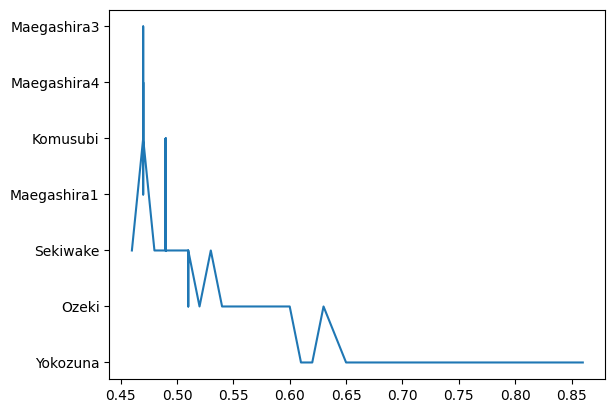

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(with_500_wins["pct"], with_500_wins["top_rank"])

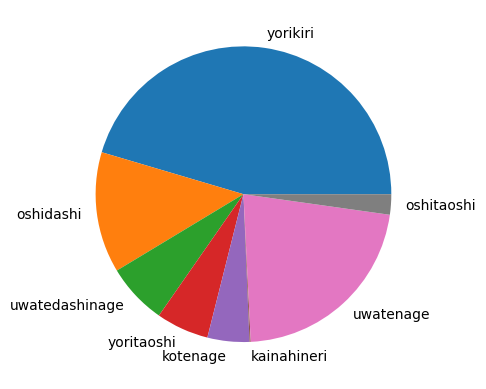

In [21]:
# This doesn't yet have all possible kimarite!
hakuho_kimarite = [
    kimarite_dict[1123].count("yorikiri"),
    kimarite_dict[1123].count("oshidashi"),
    kimarite_dict[1123].count("uwatedashinage"),
    kimarite_dict[1123].count("yoritaoshi"),
    kimarite_dict[1123].count("kotenage"),
    kimarite_dict[1123].count("kainahineri"),
    kimarite_dict[1123].count("uwatenage"),
    kimarite_dict[1123].count("oshitaoshi")
]
hakuho_kimarite_labels = ["yorikiri", "oshidashi", "uwatedashinage", "yoritaoshi", "kotenage", "kainahineri", "uwatenage", "oshitaoshi"]
plt.pie(hakuho_kimarite, labels = hakuho_kimarite_labels)
plt.show()

In [ ]:
#TO DO LIST###############################################

# Ranking Data Dictionary

# Kimarite Data Dictionary

<!-- TO DO: re-do all those win/loss things, but with ID instead of Shikona -->